In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'processed_survey_data.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [7]:
data['treatment'] = data['treatment'].map({0: 'No', 1: 'Yes'})
data['work_interfere'] = data['work_interfere'].map({0: 'Never', 1: 'Rarely', 2: 'Sometimes', 3: 'Often'})

color_dict = {
    'Yes': '#CC8963',
    'No': '#5975A4',
    'Sometimes': '#5F9E6E',
    'Never': '#5975A4',
    'Rarely': '#CC8963',
    'Often': '#B55D60',
    "Don't know": '#5F9E6E'
}

def clean_gender(gender):
    gender = str(gender).strip().lower()
    if gender in ['male', 'm', 'man', 'cis male', 'male (cis)', 'cis man', 'Guy']:
        return 'Male'
    elif gender in ['female', 'f', 'woman', 'cis female', 'female (cis)', 'cis woman']:
        return 'Female'
    elif 'trans' in gender and 'male' in gender:
        return 'transMale'
    elif 'trans' in gender and 'female' in gender:
        return 'transFemale'
    elif gender in ['non-binary', 'nonbinary', 'nb', 'genderqueer', 'gender fluid']:
        return 'Other'
    else:
        return 'Other'  # 将 unknown 和 Non-binary 归为 Other

data['Gender'] = data['Gender'].apply(clean_gender)

print(data['Gender'].value_counts())

Gender
Male         976
Female       244
Other         27
transMale      4
Name: count, dtype: int64


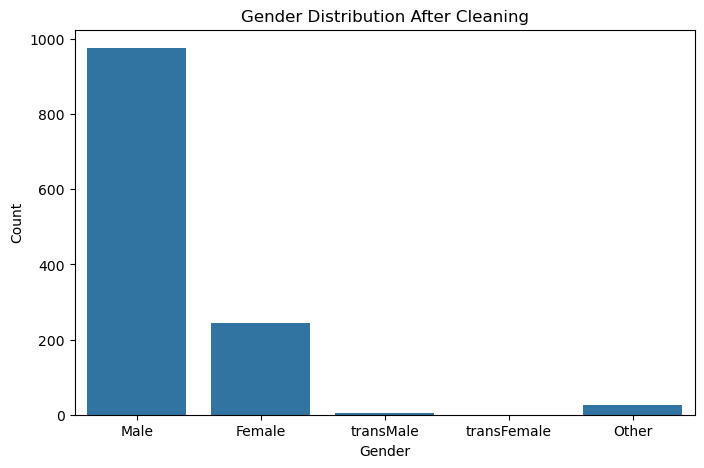

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Gender', order=['Male', 'Female', 'transMale', 'transFemale', 'Other'])
plt.title("Gender Distribution After Cleaning")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [11]:
# Check for missing values in each column
print("\nMissing values in each column:")
print(data.isnull().sum())

# Display basic statistics of numeric data
print("\nDescriptive statistics of numeric data:")
print(data.describe())

# Check unique values in categorical columns
print("\nUnique values in categorical columns:")
print(data.select_dtypes(include=['object']).nunique())


Missing values in each column:
Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                           0
self_employed                   0
family_history                  0
treatment                       0
work_interfere                262
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1090
dtype: int64

Descriptive statistics of numeric da

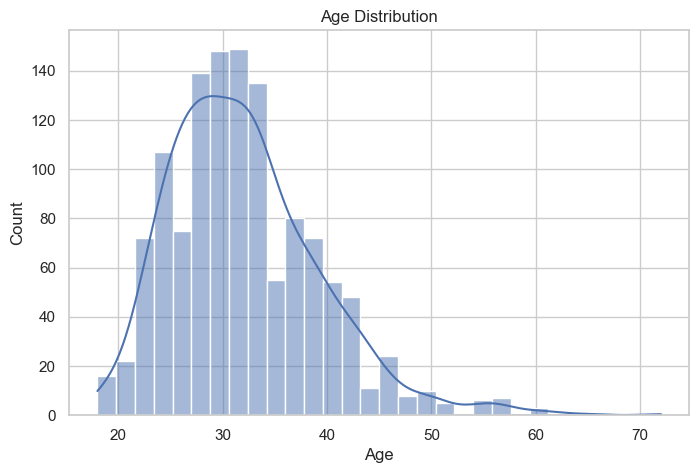

In [13]:
# Set plot style
sns.set(style="whitegrid")

# Age distribution plot
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

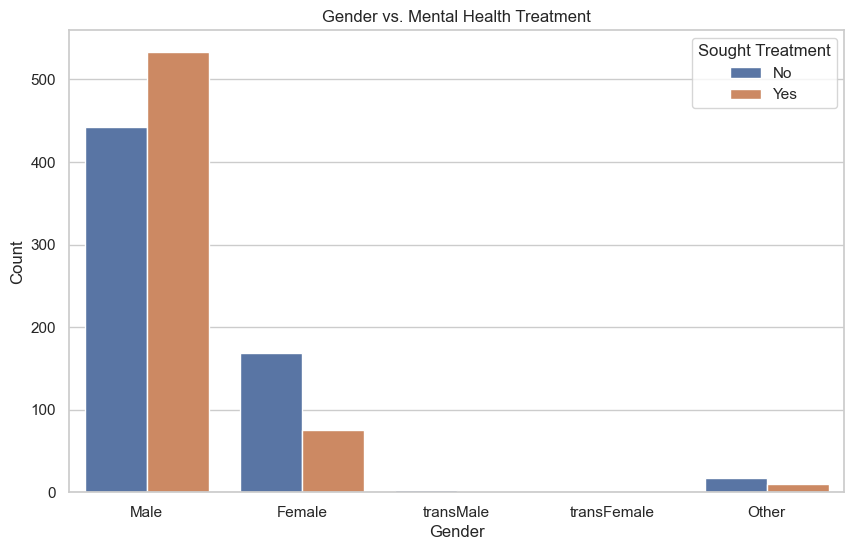

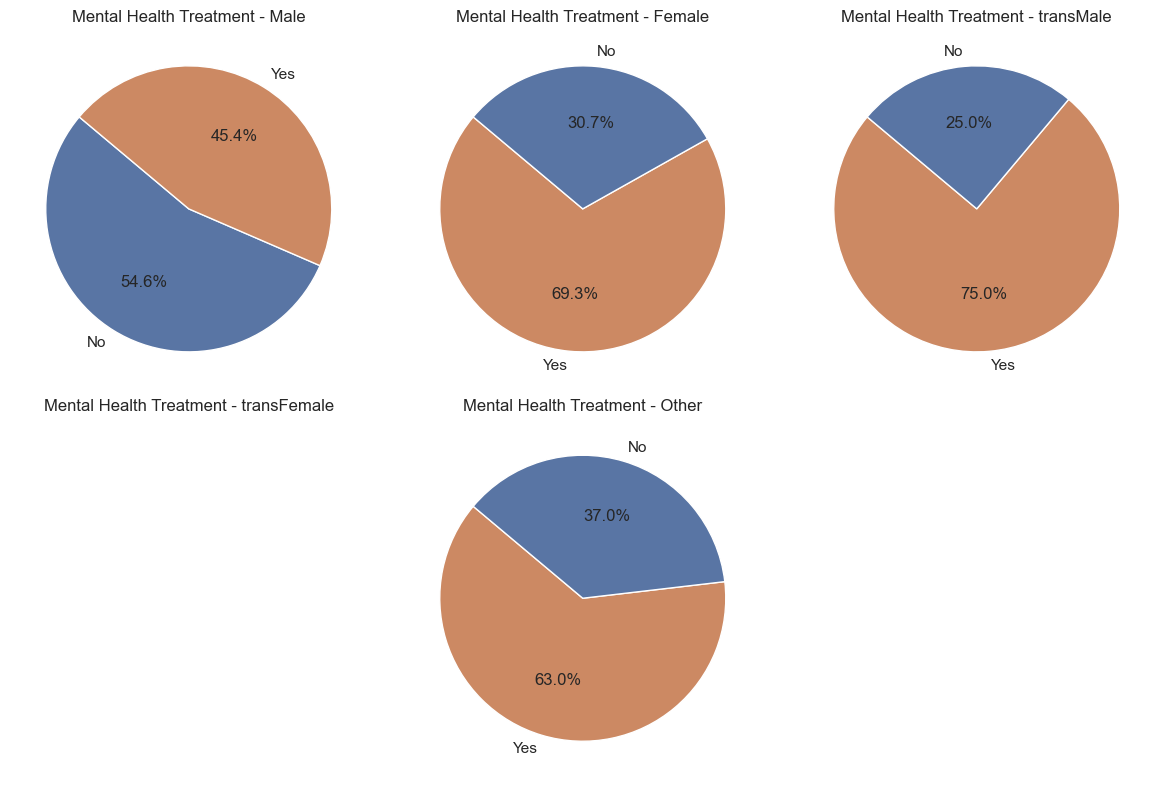

In [15]:
# Gender vs Treatment

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Gender', hue='treatment', order=['Male', 'Female', 'transMale', 'transFemale', 'Other'])
plt.title("Gender vs. Mental Health Treatment")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Sought Treatment", labels=["No", "Yes"])
plt.show()

gender_categories = ['Male', 'Female', 'transMale', 'transFemale', 'Other']
data = data[data['Gender'].isin(gender_categories)]
plt.figure(figsize=(12, 8))

for i, gender in enumerate(gender_categories, 1):
    plt.subplot(2, 3, i)
    treatment_counts = data[data['Gender'] == gender]['treatment'].value_counts()
    colors = [color_dict[label] for label in treatment_counts.index]
    plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f"Mental Health Treatment - {gender}")
plt.tight_layout()
plt.show()

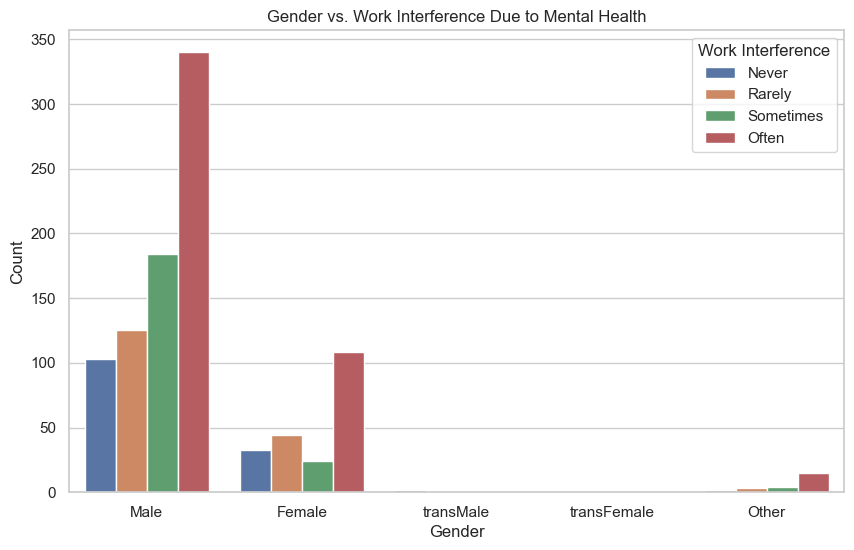

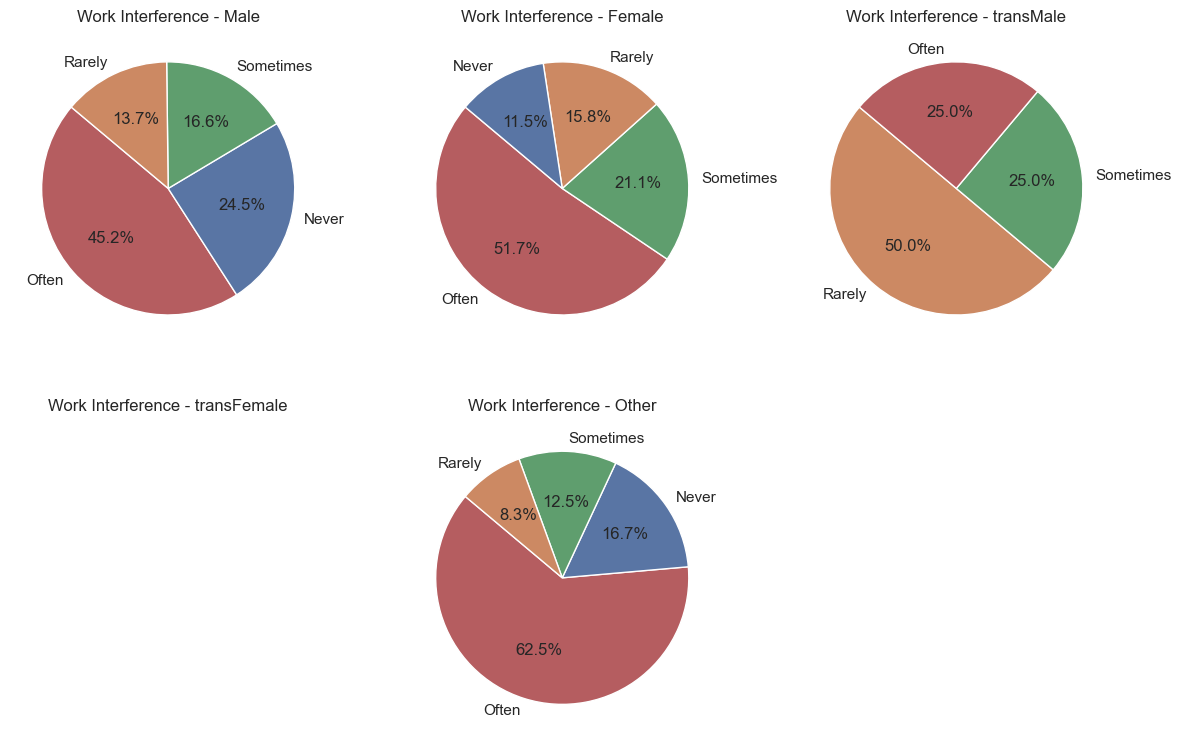

In [17]:
# Gender vs work_interfere
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Gender', hue='work_interfere', order=['Male', 'Female', 'transMale', 'transFemale', 'Other'])
plt.title("Gender vs. Work Interference Due to Mental Health")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Work Interference", labels=["Never", "Rarely", "Sometimes", "Often"])
plt.show()

plt.figure(figsize=(12, 8))
for i, gender in enumerate(gender_categories, 1):
    plt.subplot(2, 3, i)
    interfere_counts = data[data['Gender'] == gender]['work_interfere'].value_counts()
    colors = [color_dict[label] for label in interfere_counts.index]
    plt.pie(interfere_counts, labels=interfere_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f"Work Interference - {gender}")
plt.tight_layout()
plt.show()

In [19]:
employee_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']
data['age_group'] = pd.cut(data['Age'], bins=bins, labels=labels)


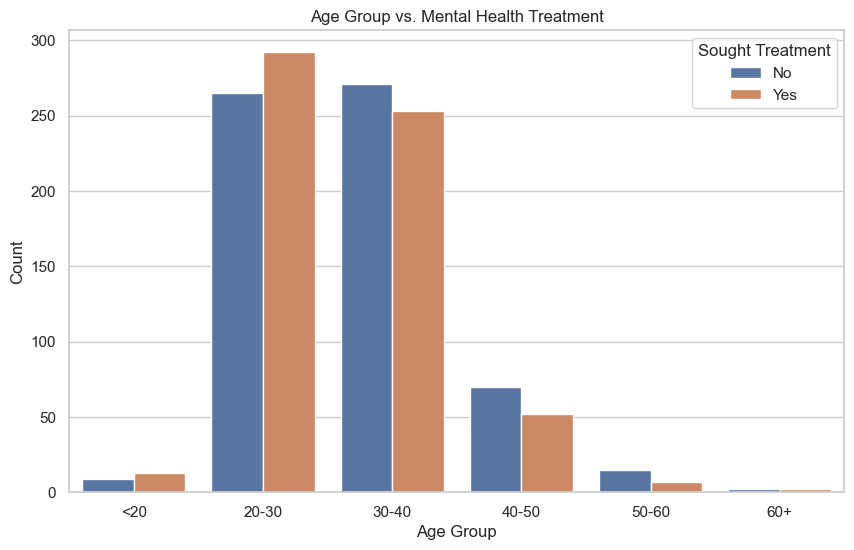

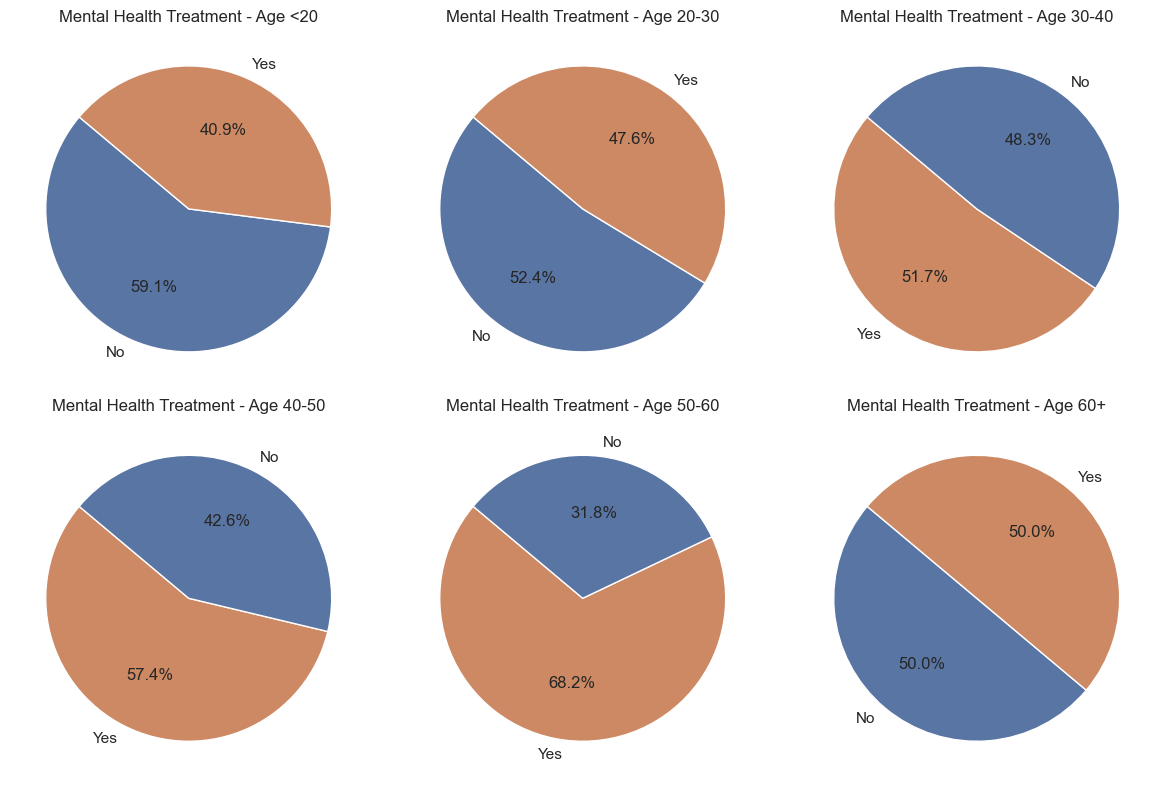

In [21]:
# Age vs Treatment
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='age_group', hue='treatment')
plt.title("Age Group vs. Mental Health Treatment")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Sought Treatment", labels=["No", "Yes"])
plt.show()

plt.figure(figsize=(12, 8))
for i, age_group in enumerate(labels, 1):
    plt.subplot(2, 3, i)
    treatment_counts = data[data['age_group'] == age_group]['treatment'].value_counts()
    colors = [color_dict[label] for label in treatment_counts.index]
    plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f"Mental Health Treatment - Age {age_group}")
plt.tight_layout()
plt.show()

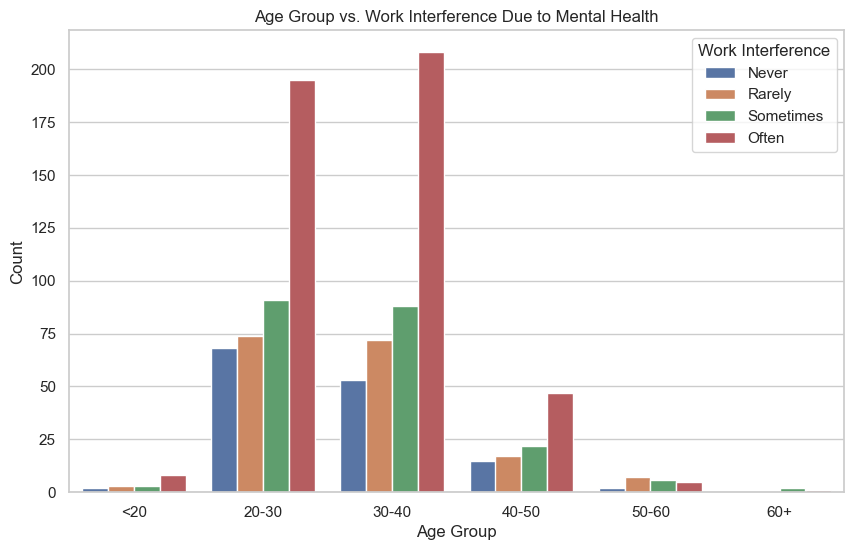

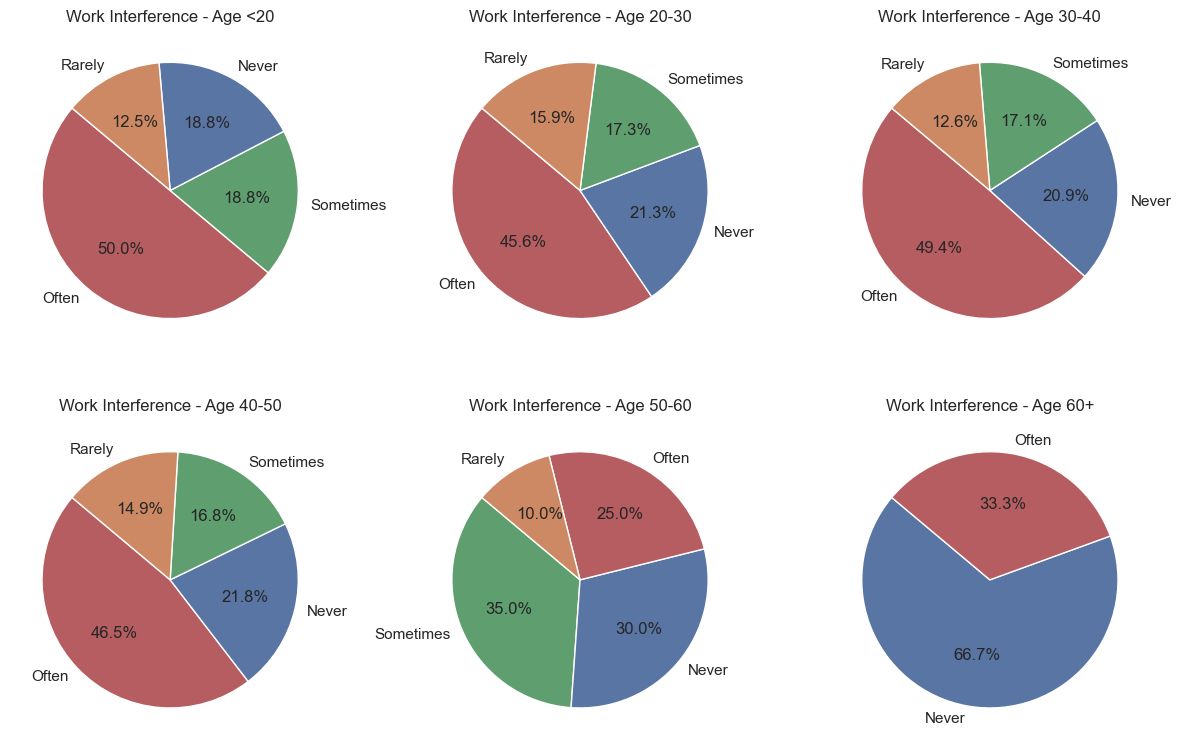

In [23]:
# Age vs work_interfere
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='age_group', hue='work_interfere')
plt.title("Age Group vs. Work Interference Due to Mental Health")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Work Interference", labels=["Never", "Rarely", "Sometimes", "Often"])
plt.show()

plt.figure(figsize=(12, 8))
for i, age_group in enumerate(labels, 1):
    plt.subplot(2, 3, i)
    interfere_counts = data[data['age_group'] == age_group]['work_interfere'].value_counts()
    colors = [color_dict[label] for label in interfere_counts.index]
    plt.pie(interfere_counts, labels=interfere_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f"Work Interference - Age {age_group}")
plt.tight_layout()
plt.show()

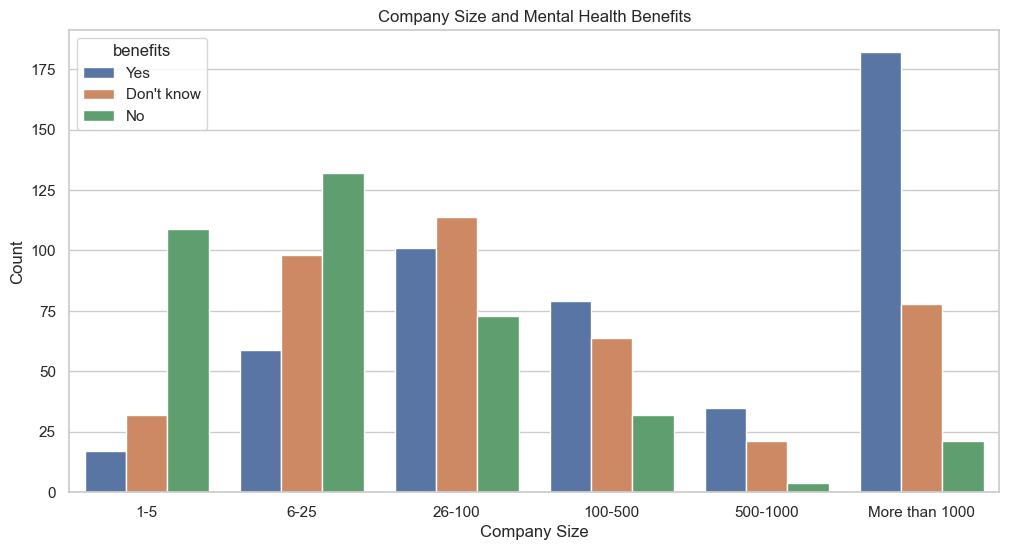

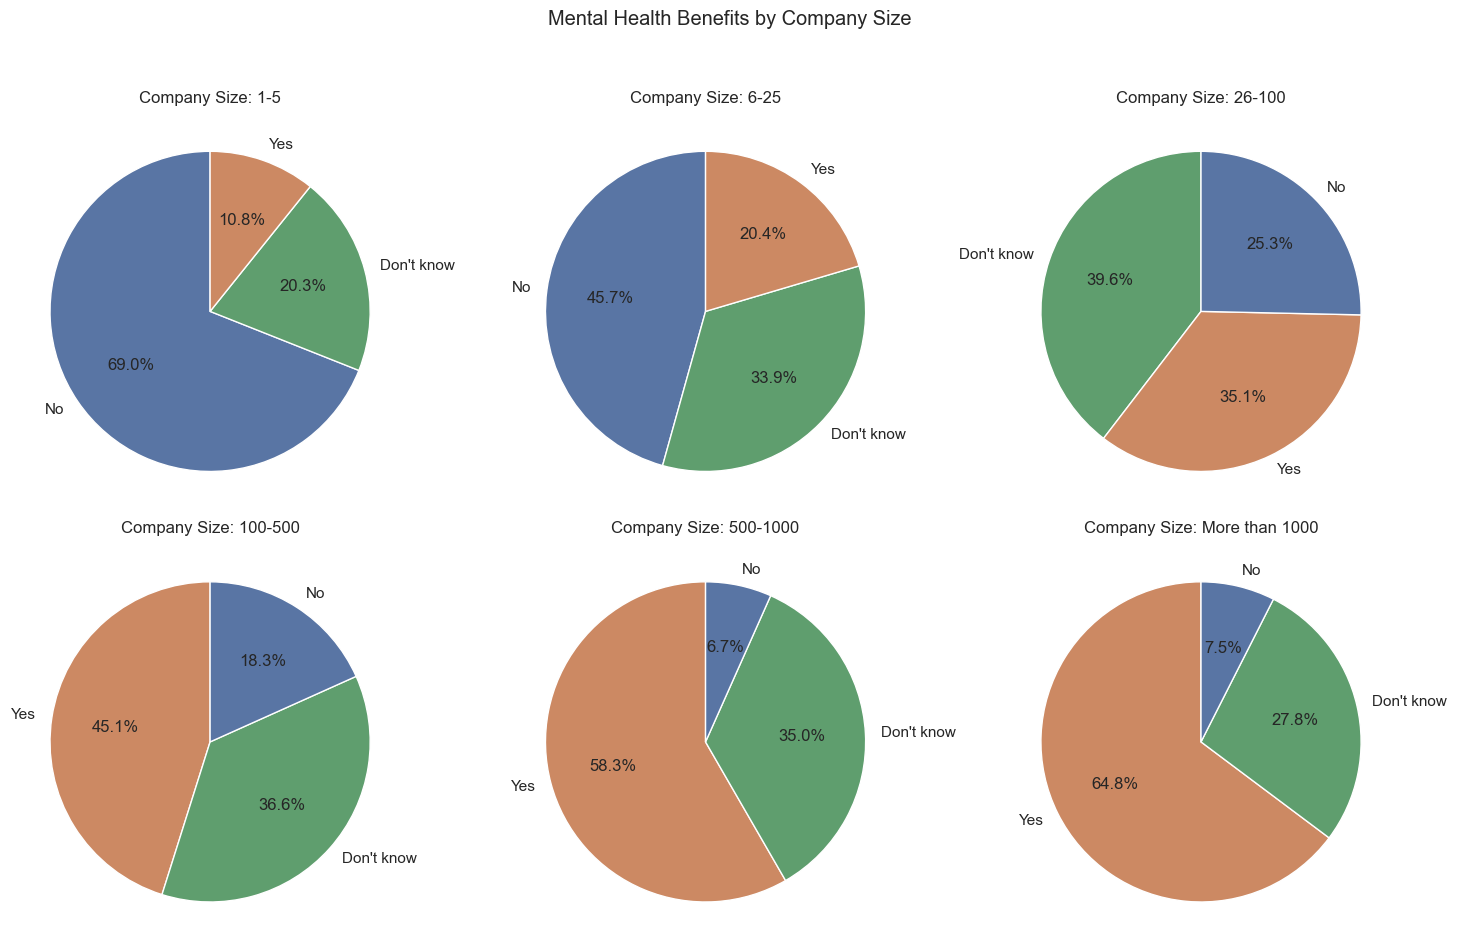

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='no_employees', hue='benefits', order=employee_order)
plt.title("Company Size and Mental Health Benefits")
plt.xlabel("Company Size")
plt.ylabel("Count")
plt.show()
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust grid size based on the number of categories
fig.suptitle("Mental Health Benefits by Company Size")

# Loop through each company size and create a pie chart for the distribution of benefits
for i, size in enumerate(employee_order):
    # Filter data for the current company size
    data_size = data[data['no_employees'] == size]

    # Get the counts for each category in 'benefits'
    benefit_counts = data_size['benefits'].value_counts()
    colors = [color_dict[label] for label in benefit_counts.index]

    # Select subplot position
    ax = axes[i // 3, i % 3]
    ax.pie(benefit_counts, labels=benefit_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(f"Company Size: {size}")

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Make space for the main title
plt.show()


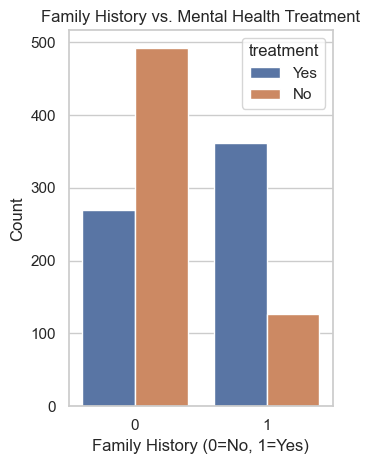

In [27]:
# Analyzing the relationship between family history and mental health treatment
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='family_history', hue='treatment')
plt.title("Family History vs. Mental Health Treatment")
plt.xlabel("Family History (0=No, 1=Yes)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

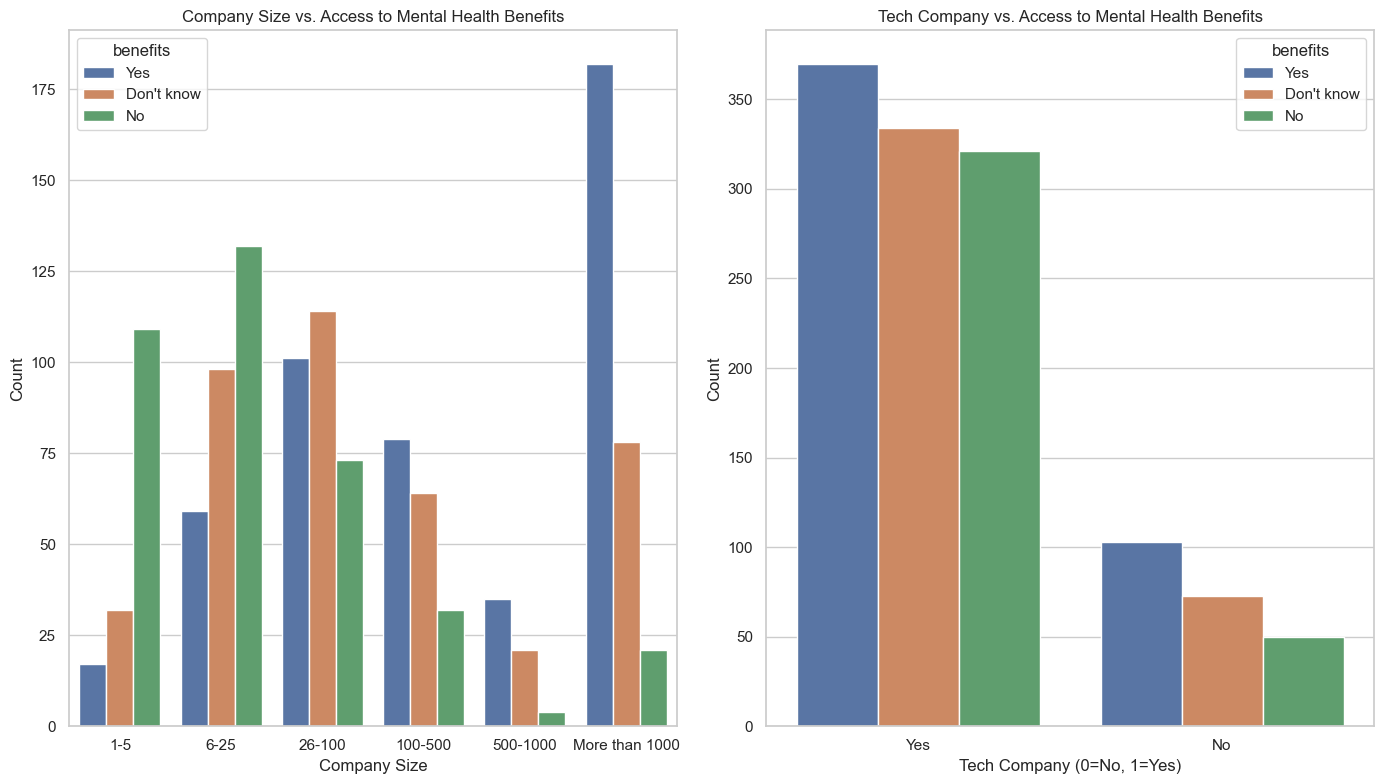

In [29]:
plt.figure(figsize=(14, 8))

# Relationship between company size and access to mental health benefits

employee_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='no_employees', hue='benefits', order=employee_order)
plt.title("Company Size vs. Access to Mental Health Benefits")
plt.xlabel("Company Size")
plt.ylabel("Count")

# Relationship between tech company status and access to mental health benefits
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='tech_company', hue='benefits')
plt.title("Tech Company vs. Access to Mental Health Benefits")
plt.xlabel("Tech Company (0=No, 1=Yes)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()